In [1]:
import pandas as pd

filename = r'input\advertising.csv'
ad = pd.read_csv(filename)
ad.sample(3) # 랜덤하게 데이터 3개 불러옴

,TV,Radio,Newspaper,Sales
181,218.5,5.4,27.4,17.2
99,135.2,41.7,45.9,17.2
24,62.3,12.6,18.3,9.7


In [2]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [3]:
ad.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


In [4]:
# 속성별 상관관계
corrMatrix = ad.corr()
corrMatrix

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


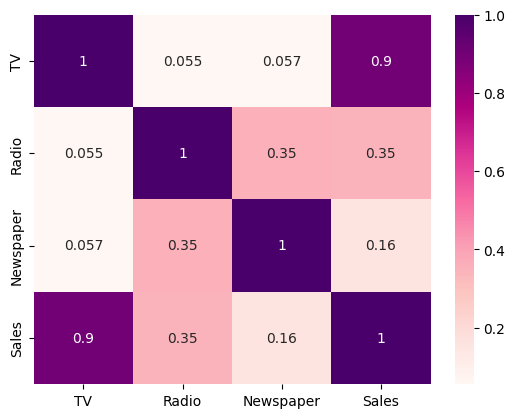

In [5]:
# 시각화 - 히트맵
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(corrMatrix, annot=True, cmap='RdPu')
plt.show()

In [6]:
# cmap 다양한 색상 종류
from matplotlib import cm

cmaps = plt.colormaps()
print(len(cmaps)) # 색상종류 -> 192개
print(cmaps)

192
['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'berlin', 'managua', 'vanimo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r'

In [7]:
# 속성의 값을 기준으로 데이터 정렬 -> Sales(판매량) 높은 순서대로
corr_sort = corrMatrix[['Sales']].sort_values('Sales', ascending=False)
corr_sort

,Sales
Sales,1.000000
TV,0.901208
Radio,0.349631
Newspaper,0.157960


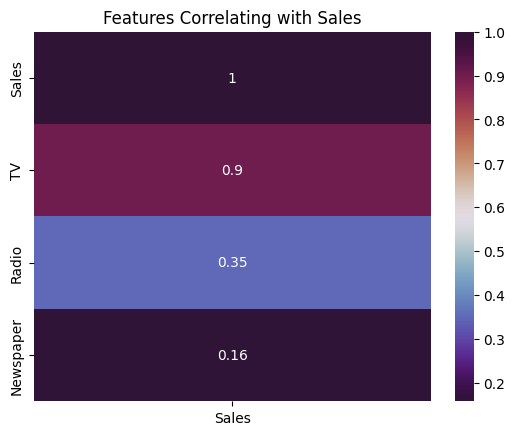

In [8]:
heatmap = sns.heatmap(corr_sort, annot=True, cmap='twilight_shifted')
heatmap.set_title('Features Correlating with Sales')
plt.show()

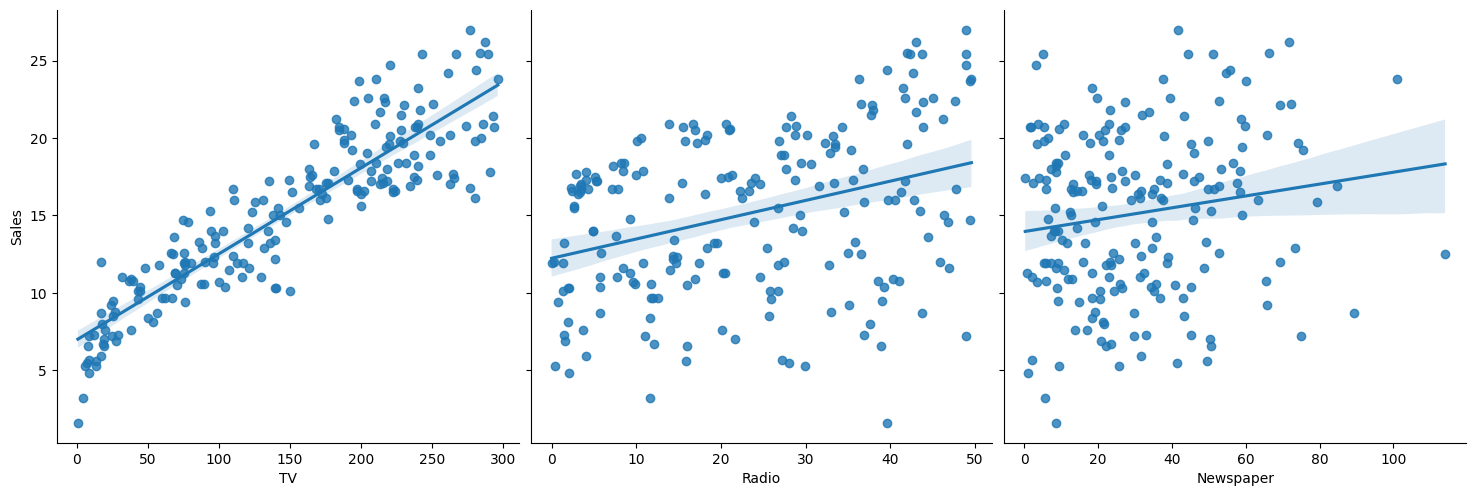

In [9]:
# 속성별 상관관계 
# x축 : tv, 라디오, 신문 
# y축 : 판매량
sns.pairplot(data=ad, x_vars=['TV', 'Radio', 'Newspaper'], y_vars=['Sales'], height=5, kind='reg') # 추세선

In [10]:
# 단순 선형 회귀 -> 데이터 나누기
X_data1 = ad[['TV']] # 독립변수
y_data1 = ad['Sales'] # 종속변수
display(X_data1) # [[]] -> 데이터프레임
display(y_data1) # [] -> 시리즈

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [11]:
# 데이터 표준화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled1 = scaler.fit_transform(X_data1) # 독립변수를 표준화시켜서 X_scaled1에 새로 저장
X_scaled1

array([[ 0.96985227],
       [-1.19737623],
       [-1.51615499],
       [ 0.05204968],
       [ 0.3941822 ],
       [-1.61540845],
       [-1.04557682],
       [-0.31343659],
       [-1.61657614],
       [ 0.61604287],
       [-0.94515567],
       [ 0.79002835],
       [-1.4390876 ],
       [-0.57850171],
       [ 0.66625345],
       [ 0.56466461],
       [-0.92530498],
       [ 1.56887609],
       [-0.90895735],
       [ 0.0030068 ],
       [ 0.8332328 ],
       [ 1.05509347],
       [-1.5628625 ],
       [ 0.94883389],
       [-0.98952781],
       [ 1.35285385],
       [-0.04837147],
       [ 1.08662104],
       [ 1.18820988],
       [-0.89260972],
       [ 1.70316018],
       [-0.3986778 ],
       [-0.58200477],
       [ 1.38438142],
       [-0.59952009],
       [ 1.67747105],
       [ 1.39956136],
       [-0.84473452],
       [-1.21372386],
       [ 0.94533082],
       [ 0.64757044],
       [ 0.34981006],
       [ 1.711334  ],
       [ 0.6989487 ],
       [-1.42390765],
       [ 0

In [12]:
# 훈련데이터와 테스트데이터 나누기
# (TV 광고비에 대한 판매량예측)
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_scaled1, y_data1, test_size=0.3, random_state=10)
print(X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape)

(140, 1) (60, 1) (140,) (60,)


In [13]:
# 모델 생성 및 학습
from sklearn.linear_model import LinearRegression

lr_model1 = LinearRegression() # 선형회귀 모델 생성
lr_model1.fit(X_train1, y_train1) # 학습

LinearRegression()

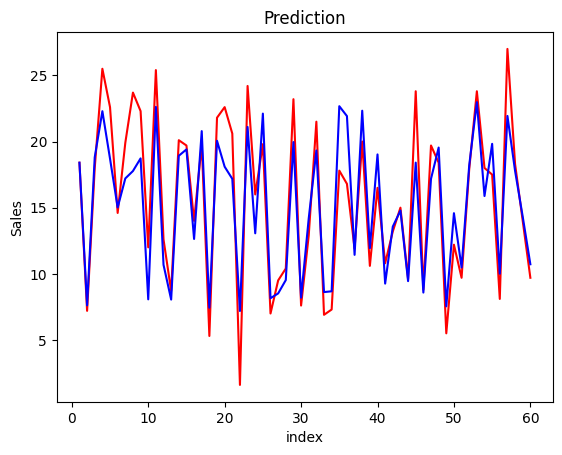

In [14]:
# 실제값과 예측값 시각화
y_pred1 = lr_model1.predict(X_test1) # 예측

# 리스트 컴프리헨션(리스트 내포) -> 연속적이나 반복적인 값을 편리하게 리스트로 표현 (for 많이 이용)
c = [i for i in range(1, 61)] 
plt.plot(c, y_test1, color='r') # 실제값 꺾은선 그래프
plt.plot(c, y_pred1, color='b') # 예측값 꺾은선 그래프
plt.xlabel('index') # x축 제목
plt.ylabel('Sales') # y축 제목
plt.title('Prediction')
plt.show()

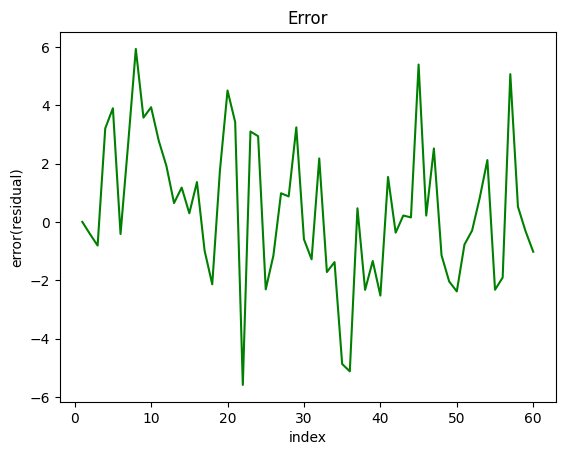

In [15]:
# 오차 시각화
error = y_test1 - y_pred1
plt.plot(c, error, color='g')
plt.xlabel('index')
plt.ylabel('error(residual)')
plt.title('Error')
plt.show()

In [16]:
# 성능평가 -> MSE(평균 제곱 오차), R^2(결정계수)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print(f'MSE : {mean_squared_error(y_test1, y_pred1):.2f}')
print(f'r2_score : {r2_score(y_test1, y_pred1):.2f}')

MSE : 6.46
r2_score : 0.83


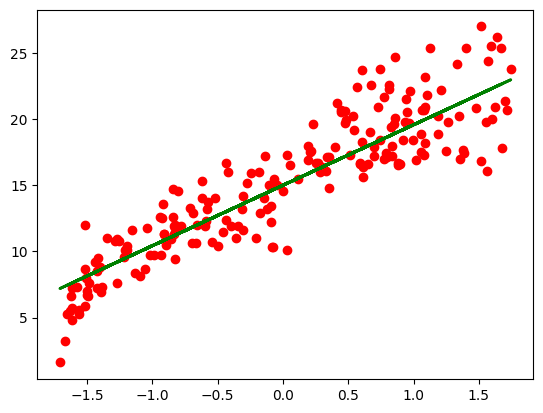

In [17]:
# 산점도
plt.scatter(X_scaled1, y_data1, color='r', label='scatter plot')
# 직선 그래프 -> 회귀선
plt.plot(X_test1, y_pred1, color='g', linewidth=2, label='Regression Line')
plt.show()

In [18]:
# 선형회귀식 구하기
# Slope Coefficients(기울기계수)
w1 = lr_model1.coef_
print(w1)
print(f'Slope of TV : {w1[0]:.2f}') # print(w1)을 해보면 리스트로 출력됨
# Intercept(절편)
b1 = lr_model1.intercept_
print(f'Intercept : {b1.round(2)}')
print(f'y = {w1[0]:.2f}x + {b1.round(2)}')

[4.57220359]
Slope of TV : 4.57
Intercept : 15.0
y = 4.57x + 15.0


In [19]:
# 다중선형회귀
# 독립변수 -> 3개 
X_data2 = ad.drop(['Sales'], axis=1)
y_data2 = ad['Sales']

# 데이터 표준화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled2 = scaler.fit_transform(X_data2)

# 훈련, 테스트 데이터 나누기
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled2, y_data2, test_size=0.3, random_state=10)
print(X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape)

# 모델 생성 및 학습
from sklearn.linear_model import LinearRegression

lr_model2 = LinearRegression()
lr_model2.fit(X_train2, y_train2)

(140, 3) (60, 3) (140,) (60,)


LinearRegression()

In [20]:
mlr = pd.DataFrame({
    'Actual_value' : y_test2, # 실제값
    'Model prediction' : lr_model2.predict(X_test2) # 예측값
})
mlr.head()

,Actual_value,Model prediction
59,18.4,19.127479
5,7.2,10.658525
20,18.0,19.356496
198,25.5,24.315643
52,22.6,20.751037


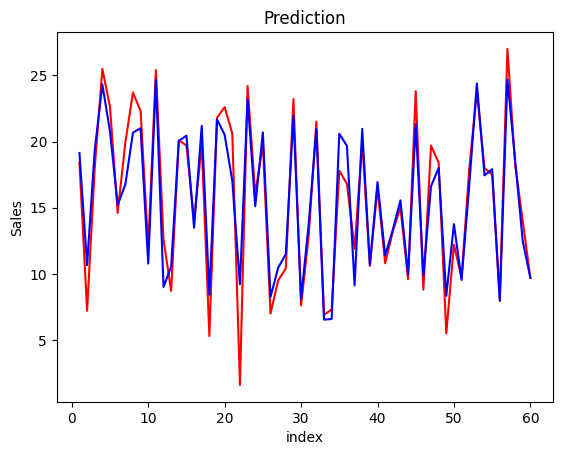

In [21]:
# 시각화 
y_pred2 = lr_model2.predict(X_test2)
c = [i for i in range(1, 61)]
plt.plot(c, y_test2, color='r')
plt.plot(c, y_pred2, color='b')
plt.xlabel('index')
plt.ylabel('Sales')
plt.title('Prediction')
plt.show()

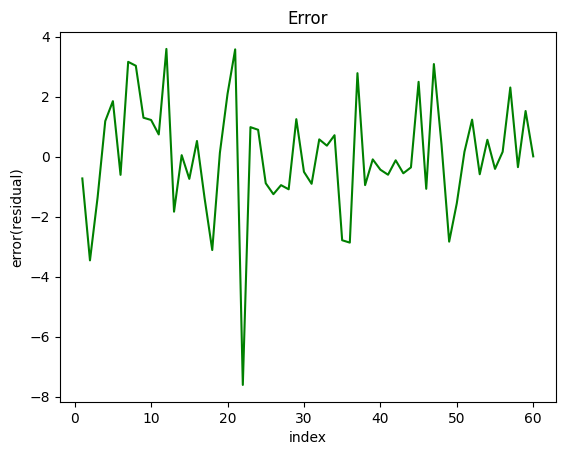

In [22]:
# 오차 시각화
error2 = y_test2 - y_pred2
plt.plot(c, error2, color='g')
plt.xlabel('index')
plt.ylabel('error(residual)')
plt.title('Error')
plt.show()

In [23]:
# 성능 평가
print(f'MSE : {mean_squared_error(y_test2, y_pred2):.2f}')
print(f'r2_score : {r2_score(y_test2, y_pred2):.2f}')

MSE : 3.66
r2_score : 0.90


In [ ]:
# 판매량 예측 
w2 = lr_model2.coef_
print(w2)
print(f'TV : {w2[0]:.2f}')
print(f'Radio : {w2[1]:.2f}')
print(f'newspaper : {w2[2]:.2f}')

b2 = lr_model2.intercept_
print(f'Intercept : {b2.round(2)}')

[4.48690288 1.5923683  0.0094239 ]
TV : 4.49
Radio : 1.59
newspaper : 0.01
Intercept : 15.13
